In [ ]:
import pandas as pd
#lire le fichier csv
data = pd.read_csv("/content/maisons.csv")

# Nouvelle section

In [ ]:
data


In [ ]:
# supprimer la date
data.drop(columns=["date"], inplace=True)

In [ ]:
data

,age,metro,epicerie,latitude,longitude,prix
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# une fonction pour binariser une colonne
# donnee: le dataframe
# colnom: le nom de la colonne
def binariser(donnee, colnom):
    # sélectinner la colonne et calculer la moyenne
    moy = donnee[colnom].mean()
    # remplacer les valeurs supérieures à la moyenne par 1
    # et le reste par 0
    donnee[colnom] = (donnee[colnom] > moy).astype(float)

# binariser latitude
binariser(data, "latitude")
# binariser longitude
binariser(data, "longitude")

In [ ]:
data

In [ ]:
# séparer les données en: entrées et sorties
X = data.iloc[:,:-1] #les caractéristiques
y = data.iloc[:,-1]  #les résulats (classes)

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

In [ ]:
X.shape

In [ ]:
X_train.shape

(331, 5)

In [ ]:
X_test.shape

(83, 5)

In [ ]:
from sklearn.linear_model import LinearRegression
#construire le modèle multiple
modele = LinearRegression().fit(X_train, y_train)
# afficher les coefficients
print ("Coefficients: ", modele.coef_)
X_train

Coefficients:  [-3.14154505e-01 -3.56233187e-03  1.27768435e+00  5.66852384e+00
  2.12446874e+00]


,age,metro,epicerie,latitude,longitude
137,13.6,319.07080,6,0.0,1.0
178,13.1,1144.43600,4,1.0,1.0
245,7.5,639.61980,5,1.0,1.0
171,3.6,383.86240,5,1.0,1.0
122,31.5,414.94760,4,1.0,1.0
...,...,...,...,...,...
275,1.5,23.38284,7,0.0,1.0
123,0.0,185.42960,0,1.0,0.0
160,3.5,49.66105,8,0.0,1.0
274,27.5,394.01730,7,1.0,1.0


In [ ]:
y_pred = modele.predict(X_test)
y_pred
df = pd.DataFrame(data=y_test.values, columns=['y_test'])
#df=pd.DataFrame(y_test)
df['y_pred'] = y_pred
df

,y_test,y_pred
0,29.3,19.166888
1,12.8,23.205011
2,37.5,40.144724
3,61.5,35.444152
4,38.8,36.129585
...,...,...
78,53.3,45.267718
79,25.3,32.165811
80,58.1,54.275276
81,63.9,54.306691


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# prédire les résulats des échantillons de test
y_pred = modele.predict(X_test)

# Evaluation du modèle
print("L'erreur quadratique moyenne: ", mean_squared_error(y_test, y_pred))
print ("Score R2: ", r2_score(y_test, y_pred))

L'erreur quadratique moyenne:  147.15601718319297
Score R2:  0.4491906490743852


In [ ]:
from joblib import dump
...
modele.fit(X_train, y_train)
dump(modele, 'mon_modele.joblib')

['mon_modele.joblib']

In [ ]:
X_train

,age,metro,epicerie,latitude,longitude
137,13.6,319.07080,6,0.0,1.0
178,13.1,1144.43600,4,1.0,1.0
245,7.5,639.61980,5,1.0,1.0
171,3.6,383.86240,5,1.0,1.0
122,31.5,414.94760,4,1.0,1.0
...,...,...,...,...,...
275,1.5,23.38284,7,0.0,1.0
123,0.0,185.42960,0,1.0,0.0
160,3.5,49.66105,8,0.0,1.0
274,27.5,394.01730,7,1.0,1.0


In [ ]:
from joblib import load
...
modele = load('mon_modele.joblib')
X_test2=[[35.8,170.73110,7,0.0,1.0]]
y_pred2 = modele.predict(X_test2)  
y_pred2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36.59210534])

In [ ]:
age_m = LinearRegression().fit(X_train[["age"]], y_train)

ypred_age = age_m.predict(X_test[["age"]])
df = pd.DataFrame(data=y_test.values, columns=['y_test'])
df['ypred_age']=ypred_age
df

,y_test,ypred_age
0,29.3,38.331115
1,12.8,33.517508
2,37.5,38.216505
3,61.5,32.400063
4,38.8,31.339924
...,...,...
78,53.3,33.918642
79,25.3,39.247992
80,58.1,40.795223
81,63.9,40.823875


In [ ]:
# Evaluation du modèle
print("L'erreur quadratique moyenne: ", mean_squared_error(y_test, ypred_age))
print ("Score R2: ", r2_score(y_test, ypred_age))

L'erreur quadratique moyenne:  271.7996013650951
Score R2:  -0.017353995272763933


In [ ]:
#Polynomial
from  sklearn.preprocessing import PolynomialFeatures
# créer des nouvelles caractéristiques
poly = PolynomialFeatures(degree=2, include_bias=False)
age_train = poly.fit_transform(X_train)
age_test = poly.fit_transform(X_test)
# entrainer un modèle linéaire
age_pm = LinearRegression().fit(age_train, y_train)
# estimer les prix à partir des données de teste
yp_age = age_pm.predict(age_test)

In [ ]:
df = pd.DataFrame(data=y_test.values, columns=['y_test'])
df['ypred_age']=ypred_age
df['yp_age']=yp_age
df

In [ ]:
# Evaluation du modèle
print("L'erreur quadratique moyenne: ", mean_squared_error(y_test, yp_age))
print ("Score R2: ", r2_score(y_test, yp_age))

L'erreur quadratique moyenne:  147.15601718319286
Score R2:  0.44919064907438555


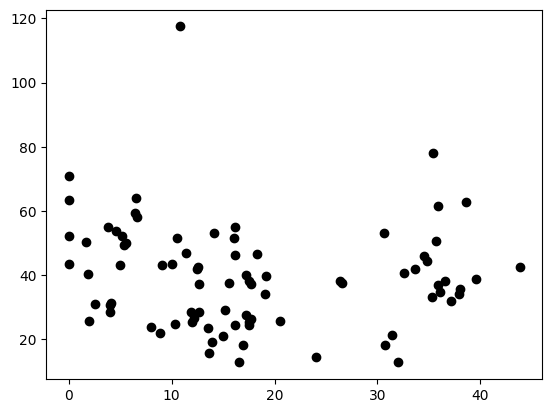

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test["age"], y_test, color="black")

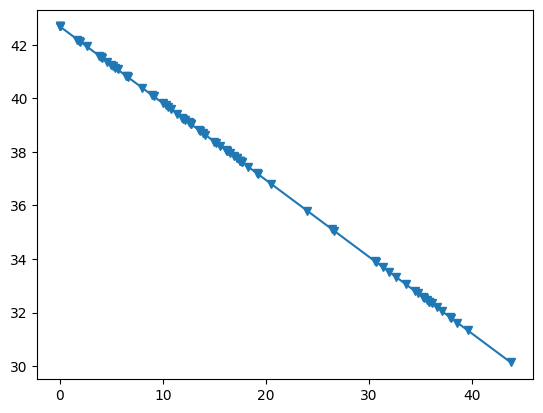

In [ ]:
new_x, new_y = zip(*sorted(zip(X_test["age"], ypred_age)))
# v: forme triangle, -: ligne
plt.plot(new_x, new_y, "v-")

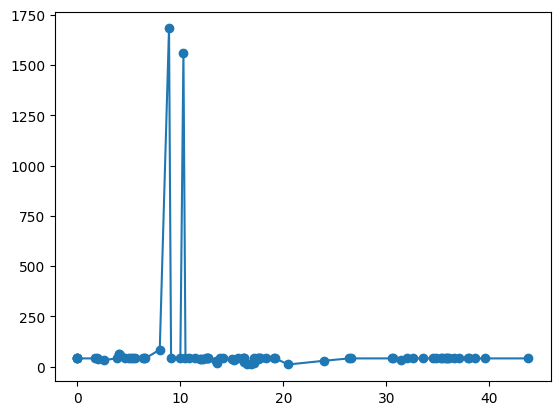

In [ ]:

new_x1, new_y1 = zip(*sorted(zip(X_test["age"], yp_age)))
# o: forme cercle, -: ligne
plt.plot(new_x1, new_y1, "o-")
#plt.plot(X_test["age"], yp_age)

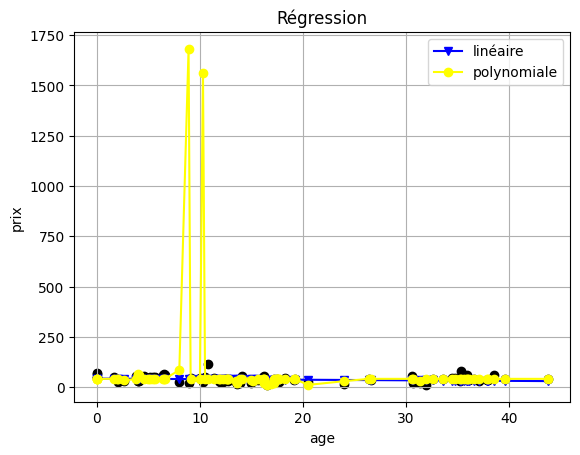

In [ ]:
import matplotlib.pyplot as plt
#plt.scatter(X_test["age"], y_test, color="black")
new_x, new_y = zip(*sorted(zip(X_test["age"], ypred_age)))
# v: forme triangle, -: ligne
plt.plot(new_x, new_y, "v-", color="blue")
new_x1, new_y1 = zip(*sorted(zip(X_test["age"], yp_age)))
# o: forme cercle, -: ligne
plt.plot(new_x1, new_y1, "o-", color="yellow")
plt.scatter(X_test["age"], y_test, color="black")
# la légende des courbes
plt.legend([u"linéaire", u"polynomiale"])

plt.xlabel("age")
plt.ylabel("prix")
plt.title(u"Régression")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.605838439378221